In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
df=pd.read_csv("cdata.csv") #導入data
df.insert(3,"label","0") #新增一個放label的column
df

,x,y,cluster,label
0,2.1364,0.8369,1,0
1,7.4096,-1.4137,3,0
2,5.0996,1.1552,0,0
3,7.8149,-1.0186,3,0
4,1.8925,1.2714,1,0
...,...,...,...,...
295,1.5798,1.9737,1,0
296,1.3918,2.5183,1,0
297,4.5359,0.4390,0,0
298,7.7911,0.3695,3,0


# Question 1

In [2]:
#定義距離函數
def dst(a1,a2,b1,b2):
    distance=(((a1-b1)**2)+((a2-b2)**2))**(1/2)
    return distance

In [3]:
#定義k-means
def k_means():
        
    #算距離，貼上label
    for i in range(len(df)):
        for j in range(k):
            dist[j]=dst(df.loc[i,"x"],df.loc[i,"y"],cent[j][0],cent[j][1])
        min_dis=min(dist)
        for l in range(k):
            if min_dis==dist[l]:
                df.loc[i,"label"]=l
    
    #畫圖
    for i in range(k):
        plt.scatter(df["x"][df["label"]==i],df["y"][df["label"]==i],c=color[i],label=i)
        plt.scatter(cent[i][0],cent[i][1],marker="x",c="black",s=100,linewidths=100)
    plt.legend(loc="upper right")
    
    
    #更新中心點
    for i in range(k):
        cent[i][0]=df["x"][df["label"]==i].sum()/len(df["x"][df["label"]==i])
        cent[i][1]=df["y"][df["label"]==i].sum()/len(df["y"][df["label"]==i])

In [37]:
k=4 #cluster數量
num=rd.sample(range(0,300),k) #取隨機的k個點當centroids

#用一個list紀錄centroids的座標
cent=[]
for i in num:
    cent.append([df.loc[i,"x"],df.loc[i,"y"]])

#用一個list紀錄距離
dist=[]
for i in range(k):
    dist.append(0)
    
#用一個list裝顏色
color=["red","orange","yellow","green"]

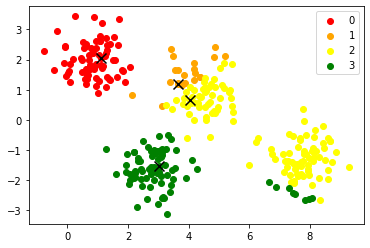

In [38]:
k_means()

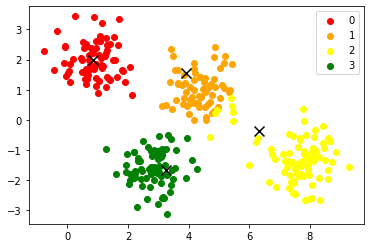

In [39]:
k_means()

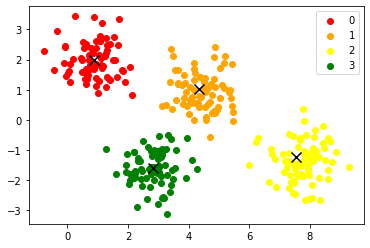

In [40]:
k_means()

# Question 2

In [15]:
#定義k-means(不畫圖，會自行判斷是否converge)
def k_means_1(list_SSE):
    
    change=0 #判斷是否改變的變數
        
    #算距離，貼上label
    for i in range(len(df)):
        for j in range(k):
            dist[j]=dst(df.loc[i,"x"],df.loc[i,"y"],cent[j][0],cent[j][1])
        min_dis=min(dist)
        for l in range(k):
            if min_dis==dist[l]:
                if df.loc[i,"label"]!=l:
                    change+=1
                df.loc[i,"label"]=l
    
    #更新中心點
    for i in range(k):
        cent[i][0]=df["x"][df["label"]==i].sum()/len(df["x"][df["label"]==i])
        cent[i][1]=df["y"][df["label"]==i].sum()/len(df["y"][df["label"]==i])
        
    #判斷是否converge(是的話算出SSE,否的話再做一次)
    if change/len(df)>0.1:
        k_means_1(list_SSE)
    else:
        SSE=0
        for i in range(len(df)):
            SSE+=(df.loc[i,"x"]-cent[df.loc[i,"label"]][0])**2+(df.loc[i,"y"]-cent[df.loc[i,"label"]][1])**2
        list_SSE.append(SSE)


In [43]:
list_SSE=[] #紀錄SSE的list

#用迴圈跑不同的K
for r in range(2,50):
    k=r
    num=rd.sample(range(0,300),k) #取隨機的k個點當centroids

    #用一個list紀錄centroids的座標
    cent=[]
    for i in num:
        cent.append([df.loc[i,"x"],df.loc[i,"y"]])

    #用一個list紀錄距離
    dist=[]
    for i in range(k):
        dist.append(0)
    
    k_means_1(list_SSE)


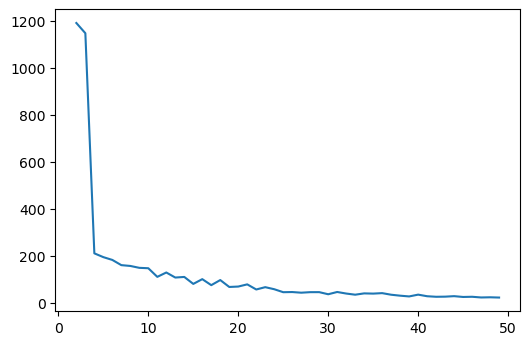

In [45]:
#設定x軸
x_axis=[]
for i in range(2,50):
    x_axis.append(i)

#畫圖
plt.figure(dpi=100,linewidth = 2)
plt.plot(x_axis,list_SSE)

# Question 3

In [42]:
list_SSE1=[] #紀錄SSE的list

#用迴圈跑10次
for r in range(10):
    k=10
    num=rd.sample(range(0,300),k) #取隨機的k個點當centroids

    #用一個list紀錄centroids的座標
    cent=[]
    for i in num:
        cent.append([df.loc[i,"x"],df.loc[i,"y"]])

    #用一個list紀錄距離
    dist=[]
    for i in range(k):
        dist.append(0)
    
    k_means_1(list_SSE1)


[148.7678746740217, 129.14849099923475, 134.66889667770852, 148.1022718478057, 134.95455942353146, 150.54519435358586, 131.26691420463038, 127.3001422247956, 130.03486442181557, 123.64738479936494]


<BarContainer object of 10 artists>

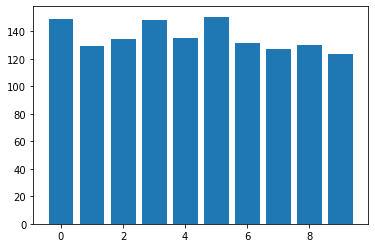

In [48]:
#畫圖
X=[0,1,2,3,4,5,6,7,8,9]
plt.bar(X,list_SSE1)